## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Business Problem

A business stakeholder at Microsoft seeks recommendations on starting their own movie studio. This could bolster their current streaming platform Microsoft Movies & TV.  Other tech giants like Amazon and Netflix have launched their own movie studios with great success (3.6 and 25 dollars in revenue respectively). Specifically the stakeholder desires to know the type of movie that would be most profitable.

In order to provide business recommendations, our team ingested datasets from IMDB, Rotten Tomatoes, The Movie Database, The Numbers, and Box Office Mojo. In this Jupyter Notebook, we have cleaned, merged and analytically explored what parameters should be evaluated in order to ensure maximum profitability. The team has decided to analyze and provide recommendations on which studios to work with, what genres should be considered and what directors should be reviewed so that profits can be maximized. The decision to dive deeper into these parameters was taken intuitively as the team predicted that studio, genre and directors would have large impact on profitability.

## Raw Datasets

The team started by importing necessary modules and all dataset files into Jupyter Notebook

In [1]:
# Import necessary modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
# Import all files into Jupyter notebook

bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv') 

imdb_name_basics = pd.read_csv('data/imdb.name.basics.csv') 
imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv') 
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv') 
imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv') 
imdb_title_principles = pd.read_csv('data/imdb.title.principals.csv') 
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv') 

rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', sep='\t')
rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding= 'unicode_escape') 

tmdb_movies = pd.read_csv('data/tmdb.movies.csv') 

tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv') 

Below are all the raw dataset names (highlighted) and their columns presented in tabular format.

![alt text](datasets.JPG)

### Profit Dataset Selection

Since the stakeholder desires profitability, the team identified bom_movie_gross, rt_movie_info and tn_movie_budgets datasets to be the only three resources that include financial data about the revenue and cost of movies. In order to obtain information on how many rows, columns and column names there are in each dataset, the team used the .info() method on each dataset.

In [3]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [5]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The team observed that only 340 movies have revenue data in rt_movie_info dataset as opposed to 5782 movies having revenue and cost data in tn_movie_budgets dataset and 2037 movies have foreign and domestic revenue data in bom_movie_gross dataset. Therefore, the team has decided to use the tn_movie_budgets and bom_movie_gross datasets and not use the rt_movie_info dataset.

Next, the team had to explore what datasets to use in order to recommend studios that generate maximum profit , genres that that generate maximum profit and directors who generate maximum profit. 

### Movie Studios Dataset Selection

For the relationship between studios and profit, only two datasets had studio information: bom_movie_gross and rt_movie_info. Since bom_movie_gross had studio information on 3382 movies (can be observed below with the `bom_movie_gross.info()` command)  and rt_movie_info had studio information on 494 movies (can be observed below with the `rt_movie_info.info()` command), the team decided to go with bom_movie_gross as it is the more robust dataset. 

In [6]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Movie Genres Dataset Selection

For the relationship between genres and profit, only two datasets had information on movie genres: imdb_title_basics and rt_movie_info. Since imdb_title_basics had genre information on 140736 movies (can be observed below with the `imdb_title_basics.info()` command)  and rt_movie_info had genre information on 1552 movies (can be observed below with the `rt_movie_info.info()` command), the team decided to go with imdb_movie_basics dataset as it is the more robust dataset. 

In [8]:
 imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [9]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


### Movie Directors Dataset Selection

For the relationship between movie directors and profit, the imdb_title_crew dataset and rt_movie_info dataset had information on movie directors. Since imdb_title_crew had 140417 movie directors (can be observed below with the `imdb_title_crew.info()` command) and rt_movie_info had 1361 movie director information (can be observed above with the `rt_movie_info.info()` command), the team decided to go with imdb_movie_basics dataset as it is the more robust dataset.

In [10]:
imdb_title_crew.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [11]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


# Movie Studios Dataset Cleaning and Analysis

The team selected bom_movie_gross dataset for movie studio analysis for reasons explained earlier. The goal is to connect studios to profits, therefore we need to merge bom_movie_gross (dataset with the studio information) with tn_movie_budget (the only dataset which holds movie profit information). So let's start by merging these two datasets.

The column to merge on is `title` for bom_movie_gross and `movie` for tn_movie_budgets as they both have movie names in them. An outer join will be performed as we don't want to lose any data.

In [12]:
df_ms = bom_movie_gross.merge(tn_movie_budgets,left_on='title', right_on='movie', how='outer')

Only the `studio`, `production_budget`, `worldwide_gross` columns are needed as the relationship between studios and profits is investigated. 

In [13]:
df_ms = df_ms[['studio','production_budget', 'worldwide_gross']]
df_ms

,studio,production_budget,worldwide_gross
0,BV,"$200,000,000","$1,068,879,522"
1,BV,NaN,NaN
2,WB,NaN,NaN
3,WB,"$160,000,000","$835,524,642"
4,P/DW,"$165,000,000","$756,244,673"
...,...,...,...
7926,NaN,"$7,000",$0
7927,NaN,"$6,000","$240,495"
7928,NaN,"$5,000","$1,338"
7929,NaN,"$1,400",$0


Some rows appear to have missing values. Since all values in each column are required for exploring the relationship between studios and profits, let's drop all rows with missing values. 

In [14]:
df_ms = df_ms.dropna()

Next, let's run `df_ms.info()` to see what are the data types of each column are and `df_ms.head()` to see what the data looks like

In [15]:
df_ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 3290
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   studio             1246 non-null   object
 1   production_budget  1246 non-null   object
 2   worldwide_gross    1246 non-null   object
dtypes: object(3)
memory usage: 38.9+ KB


In [16]:
df_ms.head()

,studio,production_budget,worldwide_gross
0,BV,"$200,000,000","$1,068,879,522"
3,WB,"$160,000,000","$835,524,642"
4,P/DW,"$165,000,000","$756,244,673"
5,Sum.,"$68,000,000","$706,102,828"
6,Par.,"$170,000,000","$621,156,389"


It appears that `production_budget` and `worldwide_gross` columns are objects, however, we need to calculate the profit of each movie by subtracting `production_budget` from `worldwide_gross`. So, we need to get rid of the commas that serve as thousand seperators, the dollar signs and finally convert all elements in each column into type `int` so that we can perform subtraction.

In [17]:
def strtoint(x):
    return int(x.replace(',', '').replace('$',''))

`strtoint` takes in a string, removes any commas and dollar signs in the string, converts it to an integer and returns that integer value. This function should be applied to each element in `production_budget` and `worldwide_gross` columns in order for both columns to be of integer type.

Let's apply `strtoint` to each element of each column using the `.map` method and lambda functions

In [18]:
df_ms['production_budget'] = df_ms['production_budget'].map(lambda x: strtoint(x) if type(x) == str else x)
df_ms['worldwide_gross'] = df_ms['worldwide_gross'].map(lambda x: strtoint(x) if type(x) == str else x)

<ipython-input-18-efda7ff42613>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms['production_budget'] = df_ms['production_budget'].map(lambda x: strtoint(x) if type(x) == str else x)
<ipython-input-18-efda7ff42613>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms['worldwide_gross'] = df_ms['worldwide_gross'].map(lambda x: strtoint(x) if type(x) == str else x)


Now that `production_budget` and `worldwide_gross` are both integer columns, the profit for each movie can be calculated.

In [19]:
df_ms['profit'] = df_ms['worldwide_gross'] - df_ms['production_budget']

<ipython-input-19-953f78300954>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms['profit'] = df_ms['worldwide_gross'] - df_ms['production_budget']


Let's also calculate the profit margin, which shows how much of the total gross consists of the profit.

In [20]:
df_ms['profit_margin'] = (df_ms['profit']/df_ms['worldwide_gross']) * 100

<ipython-input-20-270e8abf5855>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms['profit_margin'] = (df_ms['profit']/df_ms['worldwide_gross']) * 100


Now, the profit and profit margin of each movie is present in the dataframe. Next, let's take a look at how many movies each studio has. 

In [21]:
df_ms['studio'].value_counts()

Uni.      117
Fox       110
WB        102
Par.       74
Sony       74
         ... 
KE          1
WHE         1
SMod        1
Strand      1
Viv.        1
Name: studio, Length: 99, dtype: int64

It appears that some studios have a lot more movies than others. Let's look at the descriptive statistics for count of movies for each studio.

In [22]:
df_ms['studio'].value_counts().describe()

count     99.000000
mean      12.585859
std       23.758998
min        1.000000
25%        1.000000
50%        2.000000
75%       10.000000
max      117.000000
Name: studio, dtype: float64

The median is 4 which means half the studios have 4 or less movies and the team decided that studios that have 4 or less movies should not be considered. This is because there needs to be enough movies produced by a studio in order for the average to be more consistent. Therefore, let's extract the names of studios with less than four movies.

In [23]:
threeplusstudios = [studio for studio in df_ms['studio'].value_counts().index if df_ms['studio'].value_counts()[studio] > 4]

Now, let's filter the dataframe so that only studios with more than four movies remain. 

In [24]:
df_ms = df_ms[df_ms['studio'].isin(threeplusstudios)]

Next, let's group the dataframe by studios and take the average of profits for each studio. Let's also pick the top 10 studios with the highest profit per movie and see what the dataframe looks like.

In [25]:
df_sp = df_ms.groupby('studio').mean().sort_values('profit', ascending=False).iloc[0:10]
df_sp

,production_budget,worldwide_gross,profit,profit_margin
studio,,,,
P/DW,1.334000e+08,5.078028e+08,3.744028e+08,50.256345
BV,1.312611e+08,4.623058e+08,3.310447e+08,45.869992
Uni.,5.639060e+07,2.335837e+08,1.771931e+08,46.807043
Fox,7.050455e+07,2.435983e+08,1.730938e+08,50.038826
WB (NL),5.807027e+07,2.308342e+08,1.727639e+08,61.320895
Sony,6.825000e+07,2.378623e+08,1.696123e+08,58.097283
WB,8.036961e+07,2.175864e+08,1.372168e+08,36.524094
Par.,6.445946e+07,1.951109e+08,1.306514e+08,14.315212
Sum.,3.415000e+07,1.198865e+08,8.573647e+07,-19.073320


Let's also group the dataframe by studios and take the average of profit margins for each studio. Let's also pick the top 10 studios with the highest profit margin per movie and see what the dataframe looks like.

In [26]:
df_spm = df_ms.groupby('studio').mean().sort_values('profit_margin', ascending=False).iloc[0:10]
df_spm

,production_budget,worldwide_gross,profit,profit_margin
studio,,,,
BH Tilt,2.800000e+06,1.323772e+07,1.043772e+07,75.599998
TriS,2.748889e+07,9.119100e+07,6.370211e+07,69.207628
WB (NL),5.807027e+07,2.308342e+08,1.727639e+08,61.320895
Sony,6.825000e+07,2.378623e+08,1.696123e+08,58.097283
W/Dim.,2.406250e+07,7.610649e+07,5.204399e+07,53.201242
P/DW,1.334000e+08,5.078028e+08,3.744028e+08,50.256345
Fox,7.050455e+07,2.435983e+08,1.730938e+08,50.038826
Focus,2.132051e+07,5.737277e+07,3.605226e+07,49.476851
CBS,1.920000e+07,5.156630e+07,3.236630e+07,47.365339


Finally, let's create plots to visualize the data. Let's start with a bar chart which displays profit in dollars of the top 10 highest average profit studios.

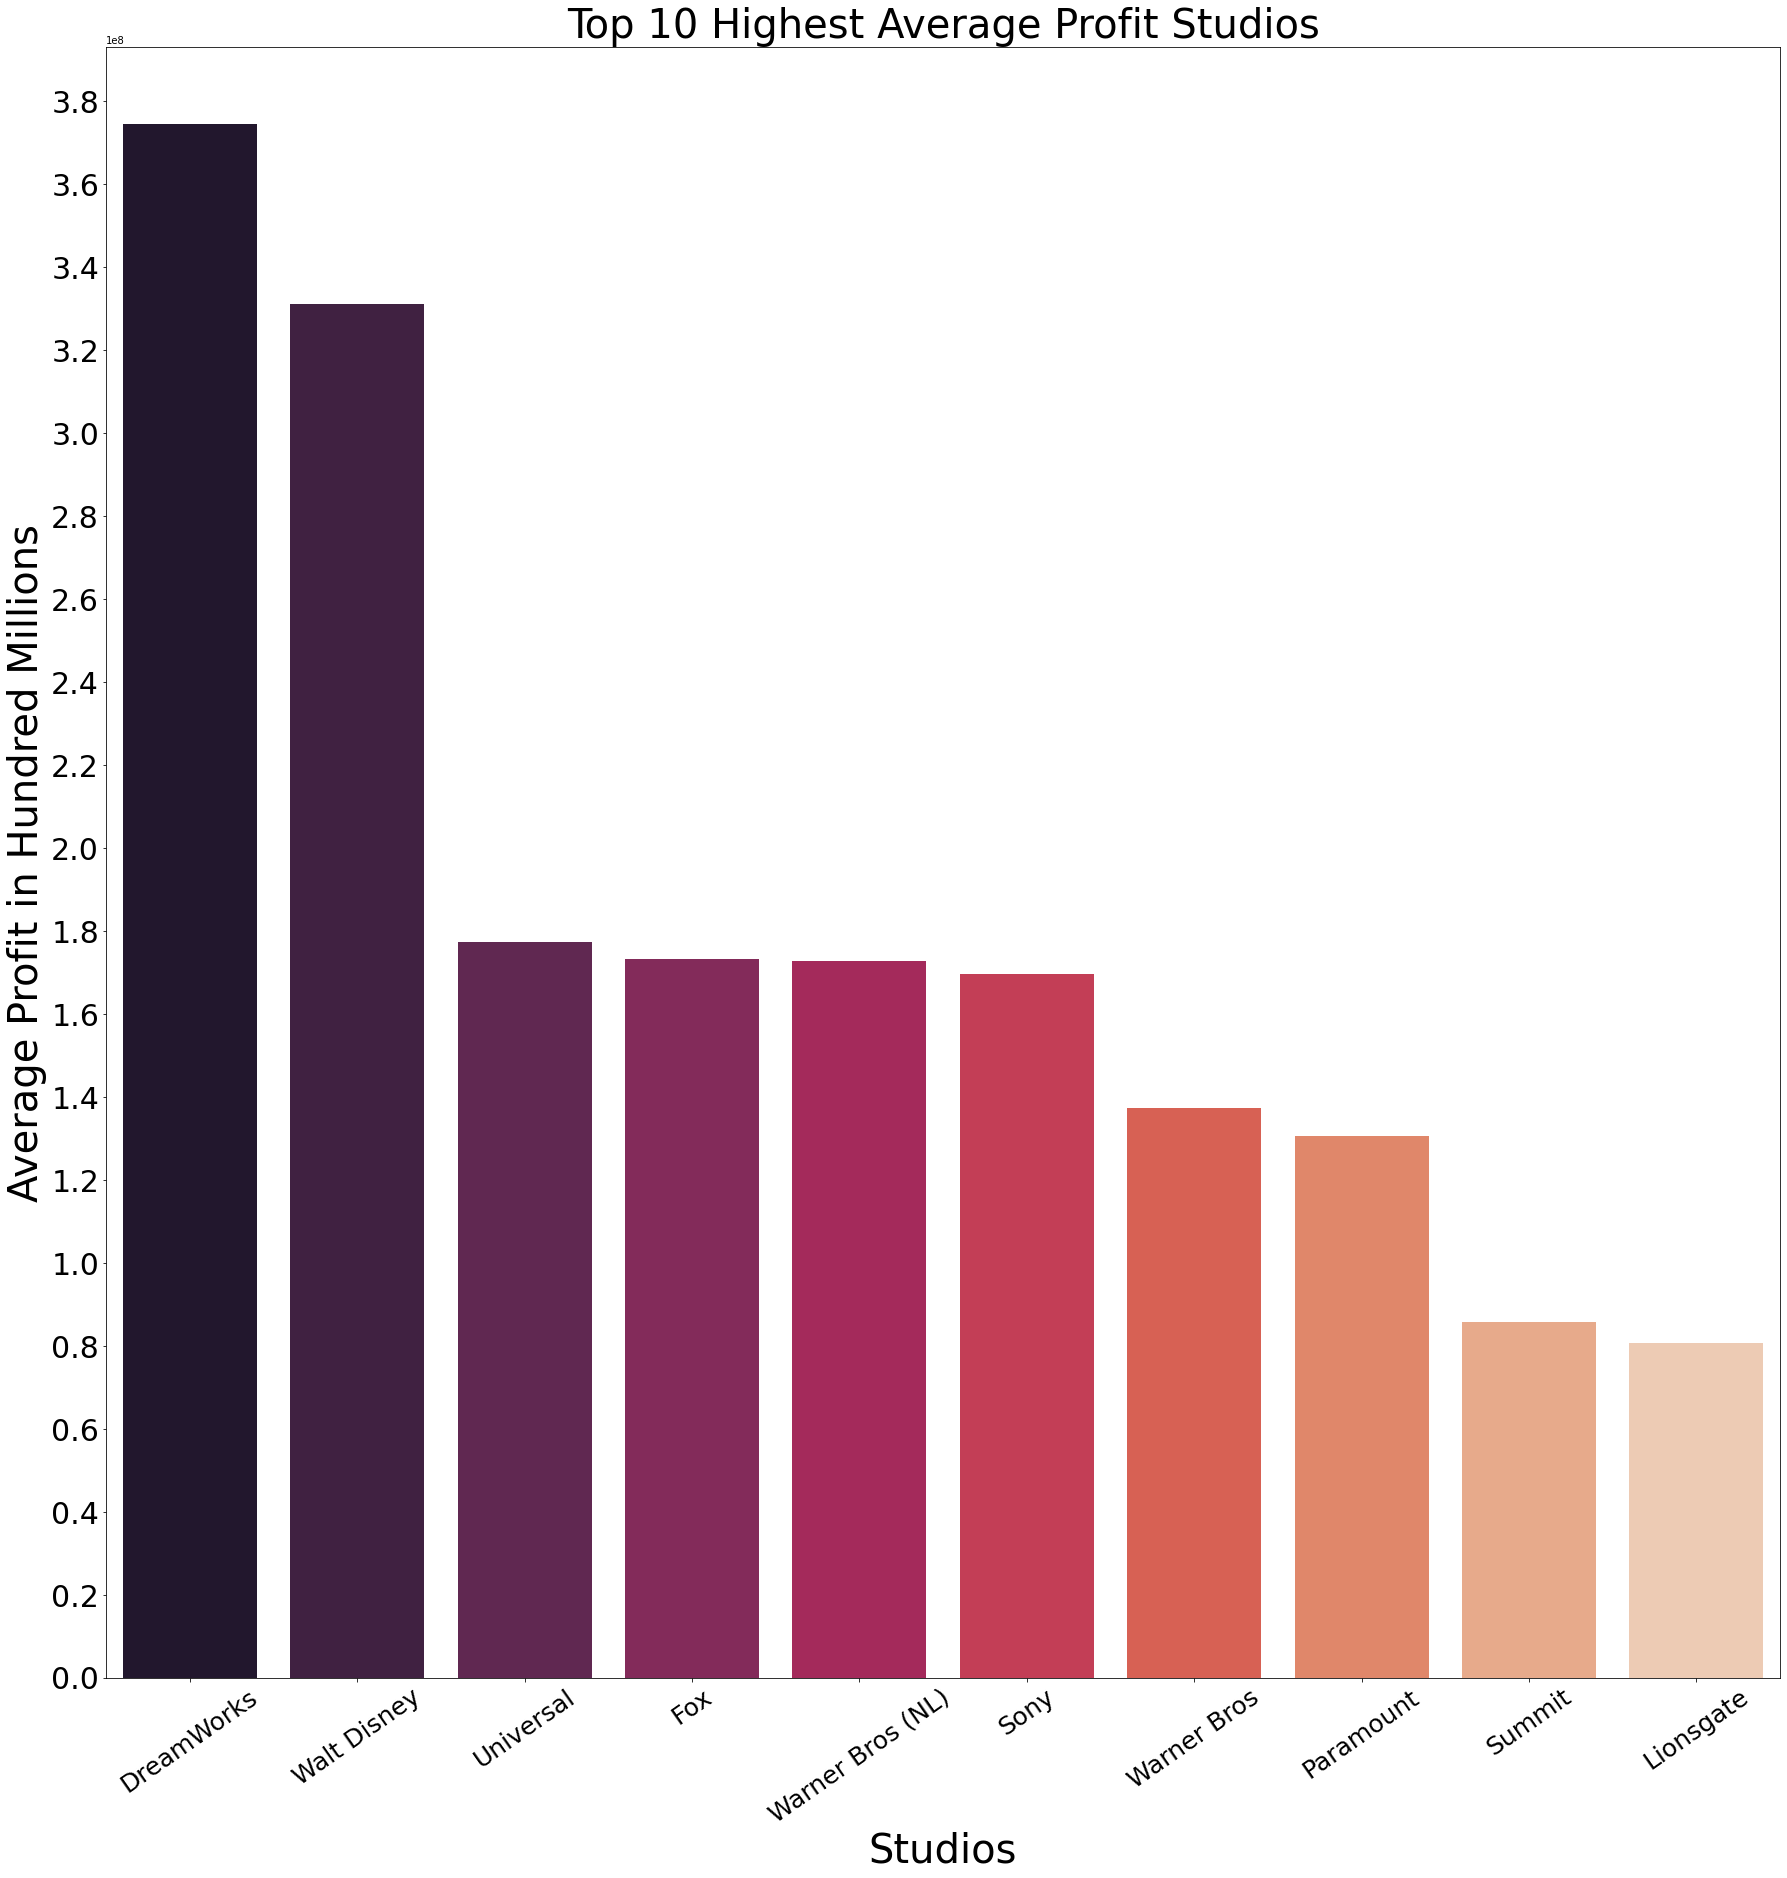

In [27]:
fig, ax = plt.subplots(figsize=(30,30))
# The dataframe has the abbreviated versions of the studios. Let's expand for better data representation
abbreviated_studios = df_sp.index
expanded_studios = ['DreamWorks','Walt Disney','Universal','Fox','Warner Bros (NL)', 'Sony', 'Warner Bros', 'Paramount', 'Summit', 'Lionsgate' ]
x = expanded_studios
y = df_sp['profit']

ax.set_title('Top 10 Highest Average Profit Studios', size=40)

sns.barplot(x=x, y=y, palette="rocket")
ax.set_xlabel('Studios', size=40)
ax.set_ylabel("Average Profit in Hundred Millions", size=40)
ax.set_xticklabels(x, size=25, rotation=35)
yticks = list(range(0, 400000000, 20000000))
plt.yticks(yticks, fontsize=30);

Let's also create a bar chart to visualize the average profit margins of the top 10 studios with the highest average profit margin.

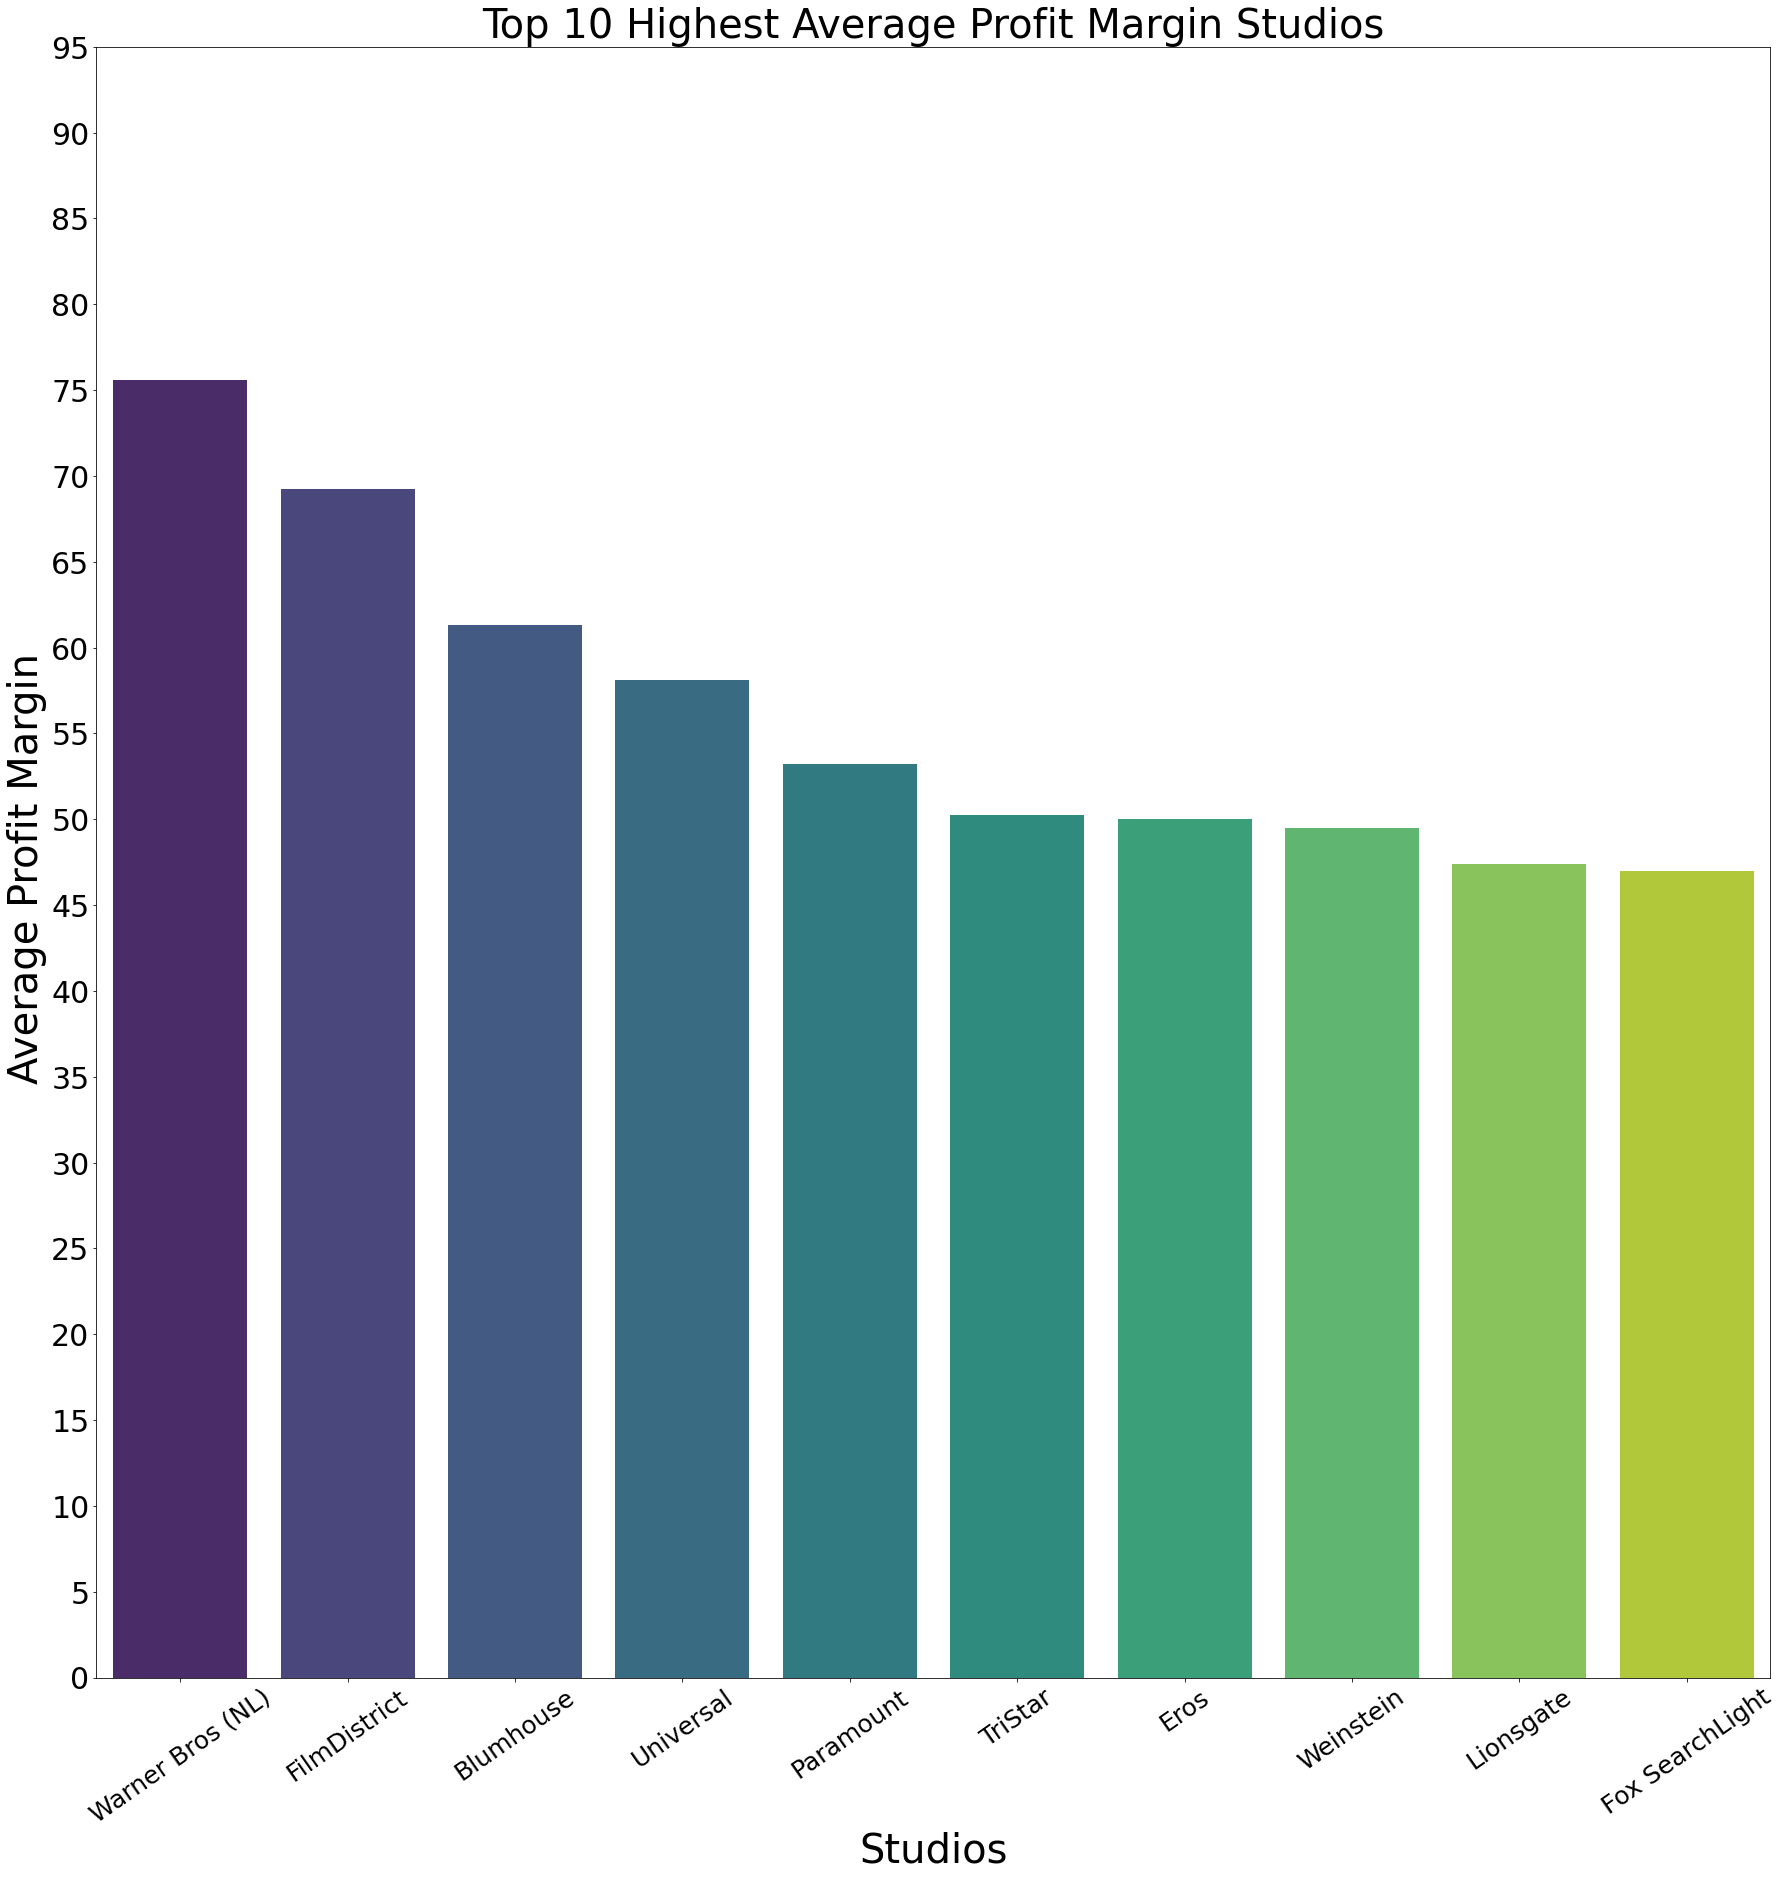

In [28]:
fig, ax = plt.subplots(figsize=(30,30))
# The dataframe has the abbreviated versions of the studios. Let's expand for better data representation
abbreviated_studios_pp = df_spm.index 
expanded_studios_ppm = ['Warner Bros (NL)', 'FilmDistrict', 'Blumhouse', 'Universal', 'Paramount', 'TriStar', 'Eros', 'Weinstein', 'Lionsgate','Fox SearchLight']
x = expanded_studios_ppm
y = df_spm['profit_margin']
ax.set_title('Top 10 Highest Average Profit Margin Studios', size=40)
sns.barplot(x=x, y=y, palette="viridis")
ax.set_xlabel('Studios', size=40)
ax.set_ylabel("Average Profit Margin ", size=40)
ax.set_xticklabels(x, size=25, rotation=35)
yticks = list(range(0, 100, 5))
plt.yticks(yticks, fontsize=30);

# Movie Genres Dataset Cleaning and Analysis

The team selected imdb_title_basics dataset for movie genres analysis for reasons explained earlier. The goal is to connect genres to profits, therefore we need to merge mdb_title_basics (dataset with the genre information) with tn_movie_budget (the only dataset which holds movie profit information). So let's start by merging these two datasets.

The column to merge on is `original title` for mdb_title_basics and `movie` for tn_movie_budgets as they both have movie names in them. An outer join will be performed as we don't want to lose any data.

In [29]:
df_mg = imdb_title_basics.merge(tn_movie_budgets,left_on='original_title', right_on='movie', how='outer')

Only the `genres`, `worldwide_gross`, `production_budgets` columns are needed as the relationship between genres and profits is investigated. 

In [30]:
df_mg = df_mg[['genres', 'worldwide_gross', 'production_budget']]
df_mg

,genres,worldwide_gross,production_budget
0,"Action,Crime,Drama",NaN,NaN
1,"Biography,Drama",NaN,NaN
2,Drama,NaN,NaN
3,"Comedy,Drama",NaN,NaN
4,"Comedy,Drama,Fantasy",NaN,NaN
...,...,...,...
149770,NaN,"$71,644","$7,000"
149771,NaN,$900,"$7,000"
149772,NaN,"$240,495","$6,000"
149773,NaN,"$1,338","$5,000"


Some rows appear to have missing values. Since all values in each column are required for exploring the relationship between genres and profits, let's drop all rows with missing values. 

In [31]:
df_mg = df_mg.dropna()

Next, let's run `df_mg.info()` to see what are the data types of each column are and `df_mg.head()` to see what the data looks like

In [32]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3473 entries, 23 to 146177
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   genres             3473 non-null   object
 1   worldwide_gross    3473 non-null   object
 2   production_budget  3473 non-null   object
dtypes: object(3)
memory usage: 108.5+ KB


In [33]:
df_mg.head()

,genres,worldwide_gross,production_budget
23,"Action,Animation,Comedy","$73,706","$45,000,000"
38,"Action,Adventure,Fantasy","$122,133,227","$20,000,000"
49,"Comedy,Mystery","$1,165,996","$200,000"
57,"Adventure,Drama,Romance","$9,313,302","$25,000,000"
58,Drama,"$9,313,302","$25,000,000"


It appears that `production_budget` and `worldwide_gross` columns are objects, however, we need to calculate the profit of each movie by subtracting `production_budget` from `worldwide_gross`. So, we need use the `strtoint` function defined earlier to convert `production_budget` and `worldwide_gross` columns into type `int`, so that we can perform subtraction. 

Let's apply `strtoint` to each element of each column using the `.map` method and lambda functions

In [34]:
df_mg['production_budget'] = df_mg['production_budget'].map(lambda x: strtoint(x) if type(x) == str else x)
df_mg['worldwide_gross'] = df_mg['worldwide_gross'].map(lambda x: strtoint(x) if type(x) == str else x)

<ipython-input-34-39201678c87c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mg['production_budget'] = df_mg['production_budget'].map(lambda x: strtoint(x) if type(x) == str else x)
<ipython-input-34-39201678c87c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mg['worldwide_gross'] = df_mg['worldwide_gross'].map(lambda x: strtoint(x) if type(x) == str else x)


Now that `production_budget` and `worldwide_gross` are both integer columns, the profit for each movie can be calculated.

In [35]:
df_mg['profit'] = df_mg['worldwide_gross'] - df_mg['production_budget']

<ipython-input-35-d8801cc8064e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mg['profit'] = df_mg['worldwide_gross'] - df_mg['production_budget']


Let's also calculate the profit margin, which shows how much of the total gross consists of the profit.

In [36]:
df_mg['profit_margin'] = (df_mg['profit']/df_mg['worldwide_gross']) * 100

<ipython-input-36-39a69c1e5d1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mg['profit_margin'] = (df_mg['profit']/df_mg['worldwide_gross']) * 100


Now, the profit and profit margin of each movie is present in the dataframe. Next, let's take a look at how many movies each genre has. 

In [37]:
df_mg['genres'].value_counts()

Drama                          402
Documentary                    266
Comedy                         123
Horror                          98
Comedy,Drama                    92
                              ... 
Biography,Drama,Western          1
Horror,Musical                   1
Family,Fantasy,Music             1
Documentary,History,Western      1
Biography,Family,Sport           1
Name: genres, Length: 337, dtype: int64

It appears that some genres have a lot more movies than others. Let's look at the descriptive statistics for count of movies for each genre.

In [38]:
df_mg['genres'].value_counts().describe()

count    337.000000
mean      10.305638
std       29.831547
min        1.000000
25%        1.000000
50%        3.000000
75%        8.000000
max      402.000000
Name: genres, dtype: float64

The median is 3 which means half the genres have 3 or less movies. The team decided that genres that have 3 or less movies should not be considered. This is because there needs to be enough movies in a genre in order for the average to be more consistent. Therefore, let's extract the names of genres with 3 or less movies.

In [47]:
threeplusgenres = [genre for genre in df_mg['genres'].value_counts().index if df_mg['genres'].value_counts()[genre] >= 10]

Now, let's filter the dataframe so that only genres with more than three movies remain. 

In [48]:
df_mg = df_mg[df_mg['genres'].isin(threeplusgenres)]

Next, let's group the dataframe by genres and take the average of profits for each genre. Let's also pick the top 10 genres with the highest profit per movie and see what it looks like.

In [61]:
df_mg_p = df_mg.groupby('genres').mean().sort_values('profit', ascending=False).iloc[0:10]
df_mg_p

,worldwide_gross,production_budget,profit,profit_margin
genres,,,,
"Action,Adventure,Sci-Fi",5.737437e+08,1.563496e+08,4.173941e+08,-inf
"Action,Adventure,Animation",4.570707e+08,1.218125e+08,3.352582e+08,-221.235359
"Adventure,Animation,Comedy",3.715453e+08,9.645946e+07,2.750859e+08,-inf
"Adventure,Family,Fantasy",3.722124e+08,1.322750e+08,2.399374e+08,-inf
"Action,Adventure,Comedy",3.169669e+08,8.243750e+07,2.345294e+08,-inf
"Action,Adventure,Thriller",3.391839e+08,1.222143e+08,2.169696e+08,54.148107
Family,2.500351e+08,3.528846e+07,2.147466e+08,-inf
"Action,Adventure,Fantasy",3.345574e+08,1.244667e+08,2.100907e+08,20.181032
Adventure,2.325522e+08,3.286250e+07,1.996897e+08,-inf


Let's also group the dataframe by genres and take the average of profit margins for each genre. Let's also pick the top 10 genres with the highest profit margin per movie and see what it looks like.

In [62]:
df_mg_pp = df_mg.groupby('genres').mean().sort_values('profit_margin', ascending=False).iloc[0:10]
df_mg_pp

,worldwide_gross,production_budget,profit,profit_margin
genres,,,,
"Comedy,Family",6.643880e+07,2.635000e+07,4.008880e+07,54.946982
"Action,Adventure,Thriller",3.391839e+08,1.222143e+08,2.169696e+08,54.148107
"Adventure,Comedy,Drama",7.818641e+07,3.506364e+07,4.312278e+07,44.165678
"Action,Adventure,Fantasy",3.345574e+08,1.244667e+08,2.100907e+08,20.181032
"Biography,Drama,History",7.850388e+07,2.344852e+07,5.505536e+07,15.426864
"Biography,Drama",6.629384e+07,2.388095e+07,4.241289e+07,9.421607
"Drama,Fantasy,Horror",4.157582e+07,2.464167e+07,1.693415e+07,8.015736
"Biography,Crime,Drama",5.470876e+07,2.481800e+07,2.989076e+07,-56.664972
"Biography,Drama,Sport",5.293935e+07,2.430769e+07,2.863166e+07,-154.565829


It appears that the last 3 of the top 10 genres with the highest profit margin have negative profit margins, meaning that the movies in those genres lost money on average. Genres that lost money shouldn't be a part of the genre recommendation, so let's drop those genres.

In [63]:
df_mg_pp = df_mg_pp.iloc[0:7]
df_mg_pp

,worldwide_gross,production_budget,profit,profit_margin
genres,,,,
"Comedy,Family",6.643880e+07,2.635000e+07,4.008880e+07,54.946982
"Action,Adventure,Thriller",3.391839e+08,1.222143e+08,2.169696e+08,54.148107
"Adventure,Comedy,Drama",7.818641e+07,3.506364e+07,4.312278e+07,44.165678
"Action,Adventure,Fantasy",3.345574e+08,1.244667e+08,2.100907e+08,20.181032
"Biography,Drama,History",7.850388e+07,2.344852e+07,5.505536e+07,15.426864
"Biography,Drama",6.629384e+07,2.388095e+07,4.241289e+07,9.421607
"Drama,Fantasy,Horror",4.157582e+07,2.464167e+07,1.693415e+07,8.015736


Finally, let's create plots to visualize the data. Let's start with a bar chart which displays profit in dollars of the top 10 highest average profit genres.

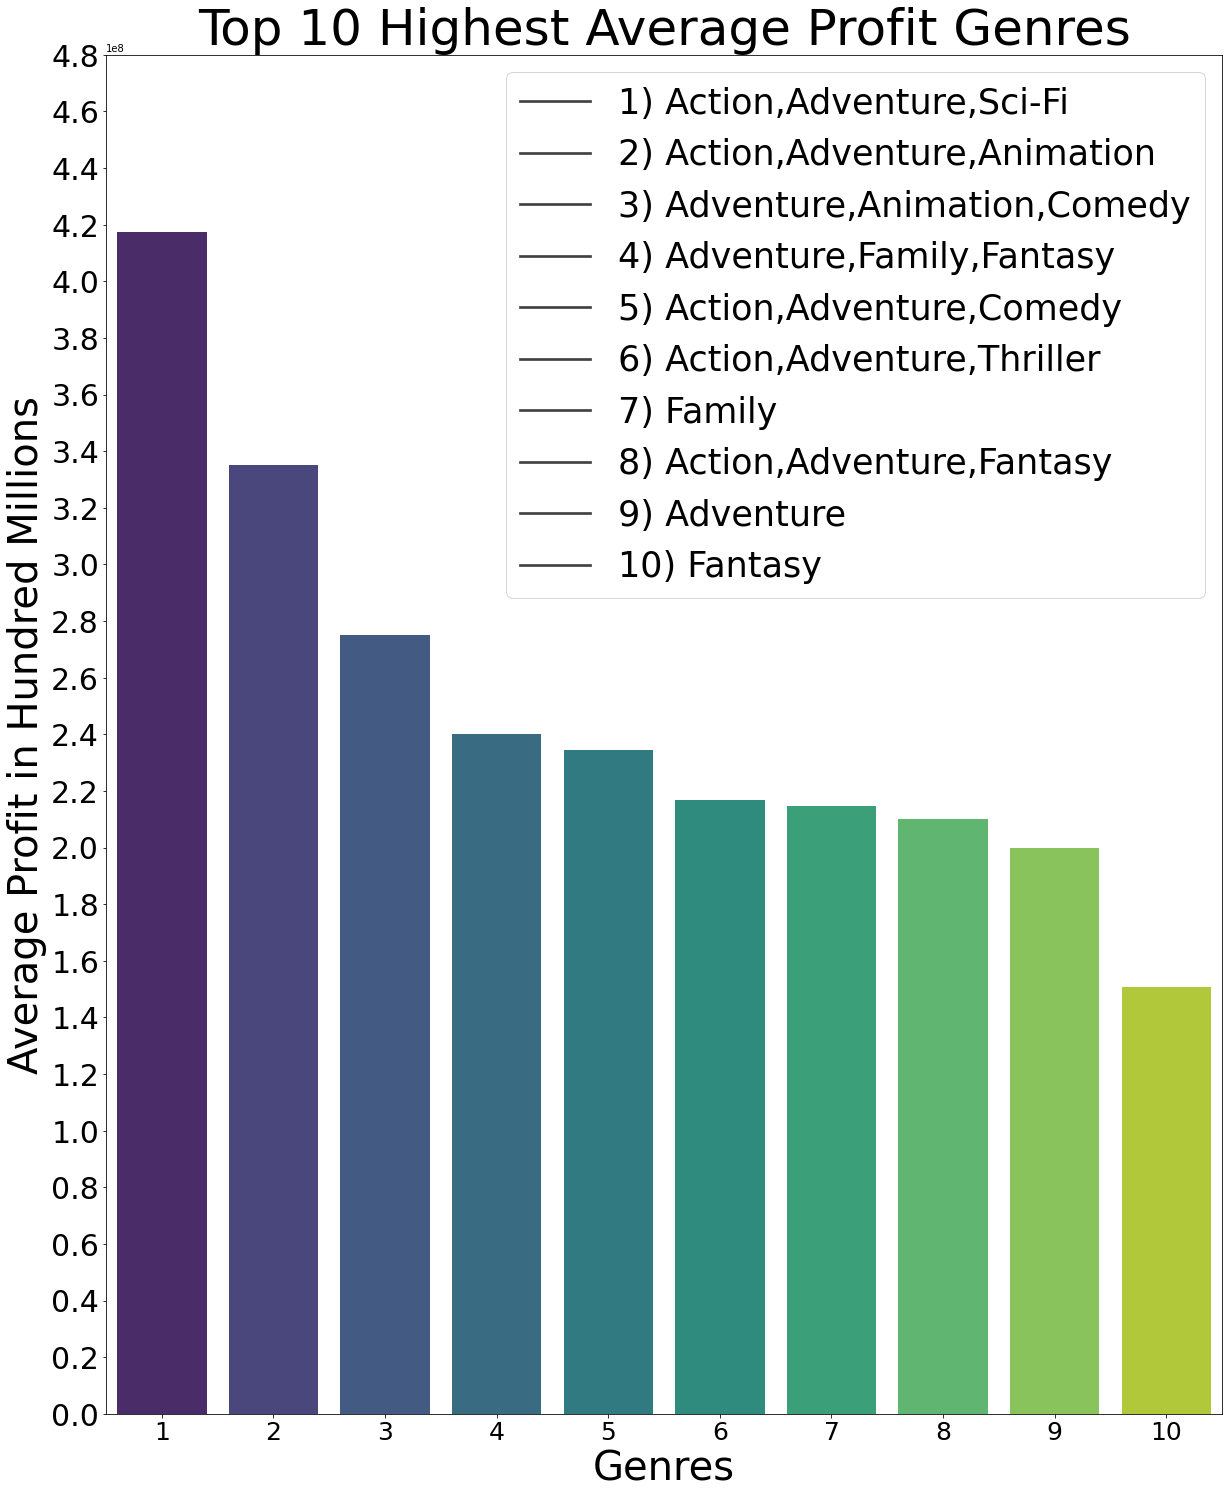

In [64]:
fig, ax = plt.subplots(figsize=(20, 25))
x = list(range(1,11)) 
y = df2_p['profit']
legend = []
for index,value in enumerate(df2_p.index):
    legend.append(str(index+1) + ') ' + value)
ax.set_title('Top 10 Highest Average Profit Genres', size=50)
sns.barplot(x=x, y=y, palette="viridis")
ax.set_xlabel('Genres', size=40)
ax.set_ylabel("Average Profit in Hundred Millions", size=40)
ax.set_xticklabels(x, size=25)
leg = ax.legend(legend, prop={"size":35})
yticks = list(range(0, 500000000, 20000000))
plt.yticks(yticks, fontsize=30);

Let's also create a bar chart to visualize the average profit margins of the top 10 genres with the highest average profit margin.

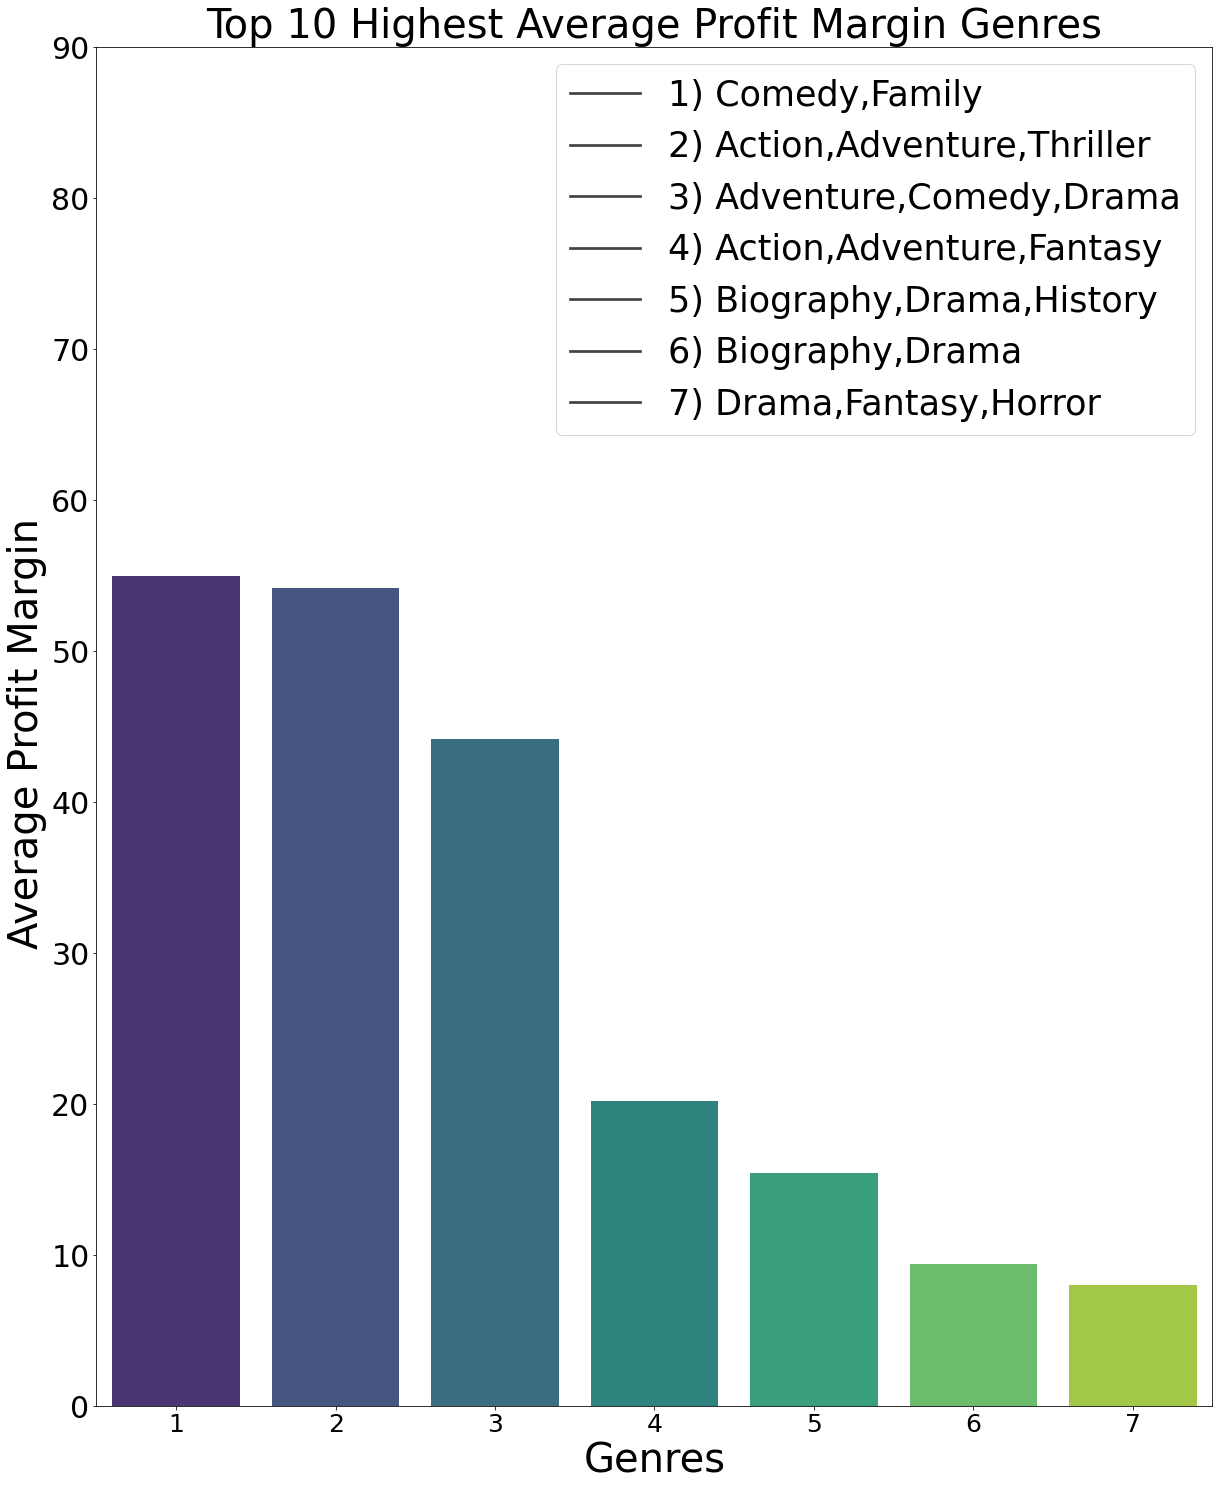

In [65]:
fig, ax = plt.subplots(figsize=(20, 25))
x = list(range(1,8)) 
y = df2_pp['profit_margin']
legend = []
for index,value in enumerate(df2_pp.index):
    legend.append(str(index+1) + ') ' + value)
ax.set_title('Top 10 Highest Average Profit Margin Genres', size=40)
sns.barplot(x=x, y=y, palette="viridis")
ax.set_xlabel('Genres', size=40)
ax.set_ylabel("Average Profit Margin ", size=40)
ax.set_xticklabels(x, size=25)
leg = ax.legend(legend, prop={"size":35})
# for legobj in leg.legendHandles:
#     legobj.set_linewidth(20.0)
yticks = list(range(0, 100, 10))
plt.yticks(yticks, fontsize=30);

In [57]:
df = imdb_title_basics.merge(tn_movie_budgets,left_on='original_title', right_on='movie', how='outer')
df2 = df[['genres', 'worldwide_gross', 'production_budget']]
df2 = df2.dropna()
df2['production_budget'] = df2['production_budget'].map(lambda x: strtoint(x) if type(x) == str else x)
df2['worldwide_gross'] = df2['worldwide_gross'].map(lambda x: strtoint(x) if type(x) == str else x)
df2['profit'] = df2['worldwide_gross'] - df2['production_budget']
df2['profit_margin'] = (df2['profit']/df2['worldwide_gross']) * 100
df2['genres'].value_counts().describe() # Descriptive stats on genre frequency data
#df2['genres'].value_counts().values
# Let's pick genres that have more than three movies. Three is the median of genre distribution of dataframe 
# and we would like to get a general idea of the profit of genres and not have 

# EXTRACT GENRES  WITH TEN OR MORE MOVIES INTO A LIST
fourplusgenres = [genre for genre in df2['genres'].value_counts().index if df2['genres'].value_counts()[genre] >= 10]

# FILTER DATAFRAME SO THAT ONLY GENRES WITH TEN OR MORE MOVIES ARE DISPLAYED
df2 = df2[df2['genres'].isin(fourplusgenres)]

df2_p = df2.groupby('genres').mean().sort_values('profit', ascending=False).iloc[0:10]
df2_pp = df2.groupby('genres').mean().sort_values('profit_margin', ascending=False).iloc[0:7]
df2_p
# fig, ax = plt.subplots(figsize=(20, 25))
# x = list(range(1,11)) 
# y = df2_p['profit']
# legend = []
# for index,value in enumerate(df2_p.index):
#     legend.append(str(index+1) + ') ' + value)
# ax.set_title('Top 10 Highest Average Profit Genres', size=50)
# sns.barplot(x=x, y=y, palette="viridis")
# ax.set_xlabel('Genres', size=40)
# ax.set_ylabel("Average Profit in Hundred Millions", size=40)
# ax.set_xticklabels(x, size=25)
# leg = ax.legend(legend, prop={"size":35})
# # for legobj in leg.legendHandles:
# #     legobj.set_linewidth(20.0)
# yticks = list(range(0, 500000000, 20000000))
# plt.yticks(yticks, fontsize=30);

,worldwide_gross,production_budget,profit,profit_margin
genres,,,,
"Action,Adventure,Sci-Fi",5.737437e+08,1.563496e+08,4.173941e+08,-inf
"Action,Adventure,Animation",4.570707e+08,1.218125e+08,3.352582e+08,-221.235359
"Adventure,Animation,Comedy",3.715453e+08,9.645946e+07,2.750859e+08,-inf
"Adventure,Family,Fantasy",3.722124e+08,1.322750e+08,2.399374e+08,-inf
"Action,Adventure,Comedy",3.169669e+08,8.243750e+07,2.345294e+08,-inf
"Action,Adventure,Thriller",3.391839e+08,1.222143e+08,2.169696e+08,54.148107
Family,2.500351e+08,3.528846e+07,2.147466e+08,-inf
"Action,Adventure,Fantasy",3.345574e+08,1.244667e+08,2.100907e+08,20.181032
Adventure,2.325522e+08,3.286250e+07,1.996897e+08,-inf


In [ ]:
fig, ax = plt.subplots(figsize=(20, 25))
x = list(range(1,8)) 
y = df2_pp['profit_margin']
legend = []
for index,value in enumerate(df2_pp.index):
    legend.append(str(index+1) + ') ' + value)
ax.set_title('Top 10 Highest Average Profit Margin Genres', size=40)
sns.barplot(x=x, y=y, palette="viridis")
ax.set_xlabel('Genres', size=40)
ax.set_ylabel("Average Profit Margin ", size=40)
ax.set_xticklabels(x, size=25)
leg = ax.legend(legend, prop={"size":35})
# for legobj in leg.legendHandles:
#     legobj.set_linewidth(20.0)
yticks = list(range(0, 100, 10))
plt.yticks(yticks, fontsize=30);

In [ ]:
def strtofloat(x):
    if ',' in x:
        x = x.replace(',', '')
        x = float(x)* 1000000
        return x
    else:
        x = float(x)
        return x
    
#strtofloat("1,131.6") 
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].map(lambda x: strtofloat(x) if type(x) == str else x)
# bom_movie_gross['foreign_gross'].map(lambda x: type(x))
# bom_movie_gross['foreign_gross'][1872]
#bom_movie_gross.sort_values('domestic_gross', ascending = False).info()

In [ ]:
# All missing value rows dropped 
bom_movie_gross_dropped = bom_movie_gross.dropna()
# BOXPLOT OF NUM OF MOVIES PER DIRECTOR
#fig,ax = plt.subplots(figsize=(15,8))
#ax.boxplot(bom_movie_gross_dropped['studio'].value_counts().values, vert=False)

# OBTAIN DESCRIPTIVE STATISTICS OF NUM OF MOVIES PER DIRECTOR
bom_movie_gross_dropped['studio'].value_counts().describe()

# EXTRACT STUDIOS WITH THREE OR MORE MOVIES INTO A LIST
threeplusmoviestudios = [movie for movie in bom_movie_gross_dropped['studio'].value_counts().index if bom_movie_gross_dropped['studio'].value_counts()[movie] >= 3]

# FILTER DATAFRAME SO THAT ONLY MOVIES MADE BY STUDIOS WITH THREE OR MORE MOVIES ARE DISPLAYED
bom_movie_gross_dropped = bom_movie_gross_dropped[bom_movie_gross_dropped['studio'].isin(threeplusmoviestudios)]

# ADD A COLUMN TO DATAFRAME WHICH HAS THE TOTAL GROSS OF EACH MOVIE IN THE DATAFRAME
bom_movie_gross_dropped['total_gross'] = bom_movie_gross_dropped['domestic_gross']  + bom_movie_gross_dropped['foreign_gross'] 

# FIND AVERAGE TOTAL GROSS OF STUDIOS AND EXTRACT THE 10 STUDIOS WITH THE HIGHEST AVERAGE TOTAL GROSS 
bom_movie_gross_filtered = bom_movie_gross_dropped.groupby('studio').mean().sort_values('total_gross', ascending=False).iloc[0:10]

# ONLY KEEP THE STUDIO AND TOTAL GROSS COLUMNS
bom_movie_gross_filtered = bom_movie_gross_filtered['total_gross']
bom_movie_gross_filtered

fig,ax = plt.subplots(figsize=(15,8))
ax.bar(bom_movie_gross_filtered.index, bom_movie_gross_filtered)
ax.set_title("Top 10 Movie Studies With The Highest Gross Product Per Year")
ax.set_xlabel("Studios")
ax.set_ylabel("Dollars in hundred million")

In [ ]:
imdb_title_basics_and_title_ratings = imdb_title_basics.merge(imdb_title_ratings, on='tconst', how='inner')
# imdb_title_basics_and_title_ratings_filtered = imdb_title_basics_and_title_ratings[imdb_title_basics_and_title_ratings['averagerating']>8]
# imdb_title_basics_and_title_ratings_sorted = imdb_title_basics_and_title_ratings.sort_values('numvotes', ascending=False)
# imdb_title_basics_and_title_ratings_groupbygenre = imdb_title_basics_and_title_ratings.groupby('genres').mean()
# x = imdb_title_basics_and_title_ratings_groupbygenre.sort_values('averagerating', ascending=False)
# x[x['numvotes'] > 1000]
genre_value_counts = imdb_title_basics_and_title_ratings['genres'].value_counts()
genre_value_counts.describe()

#genre_value_counts.values
# fiveplusmoviegenres = [genre for genre in genre_value_counts.index if genre_value_counts[genre] > 5]
# df = imdb_title_basics_and_title_ratings.copy()
# df[df['genres'].isin(fiveplusmoviegenres)]

# imdb_title_basics_and_title_ratings['genres'].value_counts()


#imdb_title_basics_and_title_ratings_sorted['genres'].value_counts()
# imdb_dict = imdb_title_basics_and_title_ratings_sorted['genres'].value_counts().to_dict()
# imdb_title_basics_and_title_ratings_sorted
# new_dict = {}
# for k,v in imdb_dict.items():
#     temp = k.split(',')
#     for t in temp:
#         if t not in new_dict:
#             new_dict[t] = v
#         else: 
#             new_dict[t] += v

# fig,ax = plt.subplots(figsize=(20,8))
# ax.bar(list(new_dict), list(new_dict.values()))
# ax.set_title("Frequency of Genres in Top 1000 Most Voted movies")
# ax.set_xlabel("Genres")
# ax.set_ylabel("Frequency")

# Genre vs Profits

In [ ]:
# MERGE imdb_title_basics WHICH HAS GENRE INFO ON MOVIES WITH tn_movie_budgets
df = imdb_title_basics.merge(tn_movie_budgets, left_on='primary_title', right_on='movie')
# KEEP GENRES AND FINANCIAL COLUMNS ONLY AND DROP THE OTHERS
df = df[['genres','production_budget','domestic_gross','worldwide_gross']]
# DROP THE MOVIES WHICH HAVE UNDEFINED GENRES
df = df.dropna()
df.info()
# df.info() tells us that production_budget, domestic_gross and worldwide_gross columns are objects. We need to 
# convert these columns to int in order to calculate total revenue of each movie

df['production_budget'] = df['production_budget'].map(lambda x: int(x.replace(',', '').replace('$', '')))
df['domestic_gross'] = df['domestic_gross'].map(lambda x: int(x.replace(',', '').replace('$', '')))
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x: int(x.replace(',', '').replace('$', '')))

# MAKE A NEW COLUMN TOTAL_GROSS THAT CONTAINS THE TOTAL REVENUE OF EACH MOVIE
df['total_gross'] = df['domestic_gross'] + df['worldwide_gross']
# MAKE A NEW COLUMN PROFIT THAT CONTAINS THE PROFIT OF EACH MOVIE
df['profit'] = df['total_gross'] - df['production_budget']
# SORT DATAFRAME BASED ON PROFIT
df = df.sort_values('profit', ascending=False).iloc[0:2483]
df

In [ ]:
imdb_title_basics['primary_title'] = imdb_title_basics['primary_title'].map(lambda x: re.sub('[.,:-]', '', x)) 
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].map(lambda x: re.sub('[.,:-]', '', x))
imdb_title_basics['primary_title'].iloc[41443]

In [ ]:
imdb_title_basics['primary_title'] = imdb_title_basics['primary_title'].map(lambda x: re.sub('[.,:-]', '', x)) 
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].map(lambda x: re.sub('[.,:-]', '', x))

# MAKE A COLUMN called release_date_year WHICH HOLDS THE YEAR OF EACH MOVIE in tn_movie_budgets dataframe
tn_movie_budgets['release_date_year'] = tn_movie_budgets['release_date'].map(lambda x: x[-4:])
# MAKE A COLUMN called movie_and_year WHICH HOLDS THE CONCATENATED VERSION OF MOVIE AND YEAR OF EACH MOVIE 
tn_movie_budgets['movie_and_year'] = tn_movie_budgets['movie'] + tn_movie_budgets['release_date_year']
# CONVERT START YEAR TO string 
imdb_title_basics['start_year_str'] = imdb_title_basics['start_year'].map(str)
# MAKE A COLUMN called movie_and_year WHICH HOLDS THE CONCATENATED VERSION OF TITLE AND YEAR OF EACH MOVIE 
imdb_title_basics['title_and_year'] = imdb_title_basics['primary_title'] + imdb_title_basics['start_year_str']



df = tn_movie_budgets.merge(imdb_title_basics, how='left', left_on='movie_and_year', right_on='title_and_year')
df['production_budget'] = df['production_budget'].map(lambda x: int(x.replace(',', '').replace('$', '')))
df['domestic_gross'] = df['domestic_gross'].map(lambda x: int(x.replace(',', '').replace('$', '')))
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x: int(x.replace(',', '').replace('$', '')))
# MAKE A NEW COLUMN TOTAL_GROSS THAT CONTAINS THE TOTAL REVENUE OF EACH MOVIE
df['total_gross'] = df['domestic_gross'] + df['worldwide_gross']
# MAKE A NEW COLUMN PROFIT THAT CONTAINS THE PROFIT OF EACH MOVIE
df['profit'] = df['total_gross'] - df['production_budget']
# SORT DATAFRAME BASED ON PROFIT
df = df.sort_values('profit', ascending=False)
# HARDCODE MISSING GENRES FOR THE TOP 50 MOVIES WITH LARGEST PROFITS
df['genres'].iloc[0] = 'Action,Sci-Fi,Fantasy,Adventure'
df['genres'].iloc[1] = 'Action,Sci-Fi,Fantasy,Adventure'
df['genres'].iloc[2] = 'Romance,Drama'
df['genres'].iloc[9] = 'Action,Sci-Fi,Fantasy,Adventure'
df['genres'].iloc[11] = 'Drama,Fantasy,Adventure'
df['genres'].iloc[15] = 'Action,Drama,Fantasy,Adventure'
df['genres'].iloc[18] = 'Action,Sci-Fi,Fantasy,Adventure'
df['genres'].iloc[21] = 'Action,Fantasy,Adventure'
df['genres'].iloc[22] = 'Action,Adventure,Drama'
df['genres'].iloc[23] = 'Animation,Drama,Adventure'
df['genres'].iloc[25] = 'Animation,Comedy,Adventure'
df['genres'].iloc[32] = 'Animation,Comedy,Adventure,Fantasy'
df['genres'].iloc[34] = 'Action,Sci-Fi,Fantasy,Adventure'
df['genres'].iloc[36] = 'Animation,Comedy,Adventure'
df['genres'].iloc[37] = 'Adventure,Sci-Fi,Drama,Action,Fantasy'
df['genres'].iloc[41] = 'Action,Adventure,Drama,Fantasy'
df['genres'].iloc[43] = 'Adventure,Fantasy'
df['genres'].iloc[49] = 'Action, Adventure, Fantasy'
# HARDCODE MISSING GENRES FOR THE TOP 50 MOVIES WITH LARGEST PROFITS
top_50_movies = df.iloc[0:50]
top_50_movies_genre_distribution = top_50_movies['genres'].value_counts()
top_50_movies_genre_distribution

# TAKE THE TOP 5 GENRE COMBINATIONS 
top_5_genre_combinations = top_50_movies_genre_distribution[0:5]

fig,ax = plt.subplots(figsize=(17,8))
ax.bar(top_5_genre_combinations.index, top_5_genre_combinations.values)
ax.set_title("Frequency of Genre Combinations in Top 50 Most Profit Generating Movies")
ax.set_xlabel("Genre Combinations")
ax.set_ylabel("Frequency")

In [ ]:
top_50_movies_genre_distribution
top_50_movies_genre_distribution_dict = top_50_movies_genre_distribution.to_dict()
top_50_movies_genre_distribution_dict
new_dict = {}
for k,v in top_50_movies_genre_distribution_dict.items():
    temp = k.split(',')
    for t in temp:
        if t not in new_dict:
            new_dict[t] = v
        else: 
            new_dict[t] += v
new_dict = {k: v for k, v in sorted(new_dict.items(), key=lambda x: x[1], reverse=True)}
new_dict

fig,ax = plt.subplots(figsize=(20,8))
ax.bar(list(new_dict), list(new_dict.values()))
ax.set_title("Frequency of Genres in Top Top 50 Most Profit Generating Movies")
ax.set_xlabel("Genres")
ax.set_ylabel("Frequency")